# Analyse des nationalités et leur évolution dans le temps

Dans ce carnet est proposée une analyse de la place des nationalités sous forme de présences dans les aires géographiques en fonction du temps.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


import pprint
import csv
import sys

import sqlite3 as sql

import time
import datetime
from dateutil import parser

from importlib import reload
from shutil import copyfile


from fanalysis.ca import CA 
from fanalysis.mca import MCA
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data1 = pd.read_csv("CSV/analyse_geo_personne.csv")

In [35]:
data1.head()

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817
3,http://www.wikidata.org/entity/Q255221,Táhirih,F,Asie,1817
4,http://www.wikidata.org/entity/Q43302262,Violante Atabalipa Ximenes de Bivar e Vellasco,F,Amérique du sud,1817


In [6]:
data1.tail()

,pk,nom,gender,zone_geo,annee_naissance
6140,http://www.wikidata.org/entity/Q60451813,Rukshana Kapali,LGBTQ,Asie,1999
6141,http://www.wikidata.org/entity/Q60614820,Kyra Gantois,F,Europe,1999
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999


In [7]:
### information sur le type de données
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pk               6145 non-null   object
 1   nom              6145 non-null   object
 2   gender           6145 non-null   object
 3   zone_geo         6145 non-null   object
 4   annee_naissance  6145 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 240.2+ KB


In [8]:
### Distribution des aires géographiques d'origine
data1.groupby(by='zone_geo').size().sort_values(ascending=False)

zone_geo
Europe              2628
Amérique du nord    1093
Asie                1000
Amérique du sud      751
Afrique              510
Océanie              163
dtype: int64

# Coder les différentes générations (25 ans)

In [9]:
### Créer une copie indépendante du DataFrame, comme on va la modifier
data_cop = data1[data1['annee_naissance'] < 2000].copy(deep=True)
data_cop.head(3)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817


In [10]:
data_cop.tail(3)

,pk,nom,gender,zone_geo,annee_naissance
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999


In [11]:
### Année minimale et maximale dans la population
min(data1['annee_naissance']), max(data1['annee_naissance'])


(1816, 1999)

In [12]:
l_25 = list(range(1816, 2017, 25))
l_25 [:5], l_25[-5:]

([1816, 1841, 1866, 1891, 1916], [1916, 1941, 1966, 1991, 2016])

In [13]:
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

data_cop['periodes'] = pd.cut(data_cop['annee_naissance'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
data_cop['periodes'] = data_cop['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
data_cop.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840


In [14]:
### compter les naissances par périodes de 25 ans
data_cop.groupby(by='periodes', observed=True).size()

periodes
1816-1840     138
1841-1865     382
1866-1890     492
1891-1915     425
1916-1940     961
1941-1965    1892
1966-1990    1599
1991-2015     256
dtype: int64

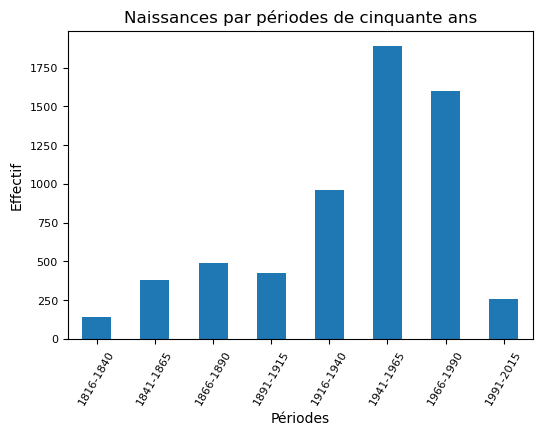

In [15]:
# Graphique qui démontre les effectifs par génération
ax = data_cop.groupby(by='periodes', observed=True).size().plot(kind='bar',rot=60, fontsize=8, figsize=(6,4))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Naissances par périodes de cinquante ans')
plt.show()

## Distribution des origines géographiques par périodes

In [16]:
data_cop[(data_cop.annee_naissance > 1800) ].groupby(by='zone_geo')\
    .size()

zone_geo
Afrique              510
Amérique du nord    1093
Amérique du sud      751
Asie                1000
Europe              2628
Océanie              163
dtype: int64

In [17]:
### Tableau de contingence
X = "periodes"  # "0"
Y = "zone_geo"

ddf = data_cop[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13885/343432698.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ddf = data_cop[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1816-1840,1841-1865,1866-1890,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015,Total
zone_geo,,,,,,,,,
Afrique,0,2,1,20,71,188,182,46,510
Amérique du nord,27,27,57,71,250,401,231,29,1093
Amérique du sud,4,9,29,70,117,257,230,35,751
Asie,1,10,28,56,114,335,394,62,1000
Europe,101,320,358,194,377,654,544,80,2628
Océanie,5,14,19,14,32,57,18,4,163
Total,138,382,492,425,961,1892,1599,256,6145


### Commentaire du tableau de contingence:
On observe avant le XXe siècle un déséquilibre entre les zones géographiques. En effet, nous possédons des données seulement sur les militant.es occidentaux pour le XIXe siècle et aussi peu de militant.es pour le début de ce siècle. C'est pourquoi nous allons concentrer l'analyse sur le XXe siècle, période où les autres zones géographiques sont plus représentées et où l'effectif est le plus grand.

## Analyse des périodes et zones géographiques: 
### création d'un tableau pour le XXe siècle

In [18]:
cdf_21 = data_cop[(data_cop.annee_naissance > 1890)].copy(deep=True)
cdf_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5133 entries, 1012 to 6144
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pk               5133 non-null   object  
 1   nom              5133 non-null   object  
 2   gender           5133 non-null   object  
 3   zone_geo         5133 non-null   object  
 4   annee_naissance  5133 non-null   int64   
 5   periodes         5133 non-null   category
dtypes: category(1), int64(1), object(4)
memory usage: 246.0+ KB


In [19]:
cdf_21

,pk,nom,gender,zone_geo,annee_naissance,periodes
1012,http://www.wikidata.org/entity/Q101037,Hans Siemsen,M,Europe,1891,1891-1915
1013,http://www.wikidata.org/entity/Q1243468,Marie Delcourt,F,Europe,1891,1891-1915
1014,http://www.wikidata.org/entity/Q15020985,Jeanne Beeckman,F,Europe,1891,1891-1915
1015,http://www.wikidata.org/entity/Q20685422,Carmen Sánchez de Bustamante Calvo,F,Amérique du sud,1891,1891-1915
1016,http://www.wikidata.org/entity/Q20859202,Liesbeth Ribbius Peletier,F,Europe,1891,1891-1915
...,...,...,...,...,...,...
6140,http://www.wikidata.org/entity/Q60451813,Rukshana Kapali,LGBTQ,Asie,1999,1991-2015
6141,http://www.wikidata.org/entity/Q60614820,Kyra Gantois,F,Europe,1999,1991-2015
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999,1991-2015
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999,1991-2015


In [20]:
tab_21 = cdf_21[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
tab_21 # tableau que nous utiliserons pour faire l'analyse statistique.

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_13885/2047431873.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tab_21 = cdf_21[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015,Total
zone_geo,,,,,,
Afrique,20,71,188,182,46,507
Amérique du nord,71,250,401,231,29,982
Amérique du sud,70,117,257,230,35,709
Asie,56,114,335,394,62,961
Europe,194,377,654,544,80,1849
Océanie,14,32,57,18,4,125
Total,425,961,1892,1599,256,5133


In [23]:
### Production du tableau à analyser --> on a enlevé les totaux
D = tab_21.iloc[0:5,0:5].copy(deep=True)
D

periodes,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015
zone_geo,,,,,
Afrique,20,71,188,182,46
Amérique du nord,71,250,401,231,29
Amérique du sud,70,117,257,230,35
Asie,56,114,335,394,62
Europe,194,377,654,544,80


In [24]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 5 , 5 ), effectif: 5008 , nombre max. facteurs: 4


In [25]:

### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)


Chi2 : 182.29347009134486 , dof : 16
p-value : 2.920912419793107e-30
phi2 = inertie (variance totale) : 0.03640045329300017
Cramer:  0.0953945141150687


In [26]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)

CA(col_labels=Index(['1891-1915', '1916-1940', '1941-1965', '1966-1990', '1991-2015'], dtype='object', name='periodes'),
   row_labels=Index(['Afrique', 'Amérique du nord', 'Amérique du sud', 'Asie ', 'Europe'], dtype='object', name='zone_geo'))

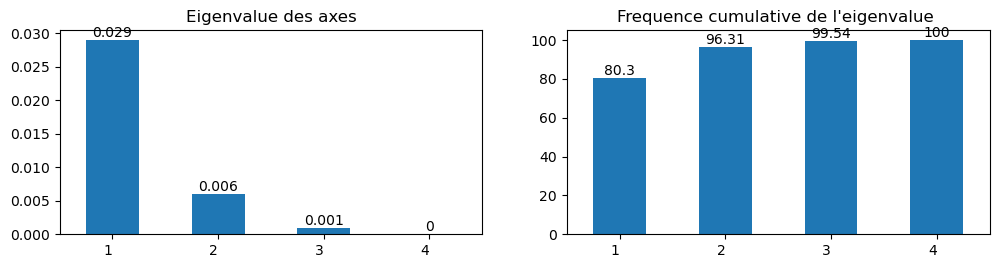

In [27]:

eig = pd.DataFrame(afc.eig_)

r1 = round(eig.iloc[0], 3)
r2 = round(eig.iloc[2], 2)
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1 = r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
ax2 = r2.plot(kind='bar', ax=axes[1], title="Frequence cumulative de l'eigenvalue ")


ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

## Graphiques et interprétation du premier plan factoriel

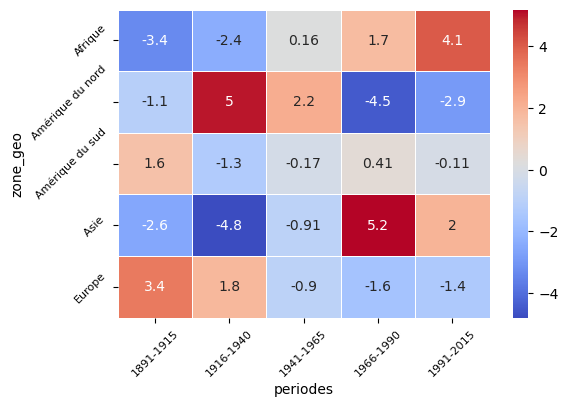

In [28]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(6,4))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=45, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=45, fontsize=8)

plt.show()

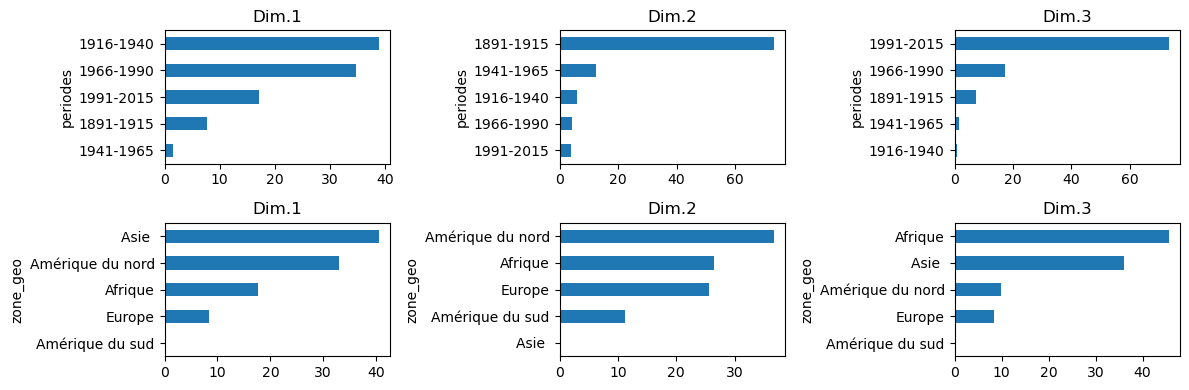

In [29]:
# Informations sur les contributions des colonnes
df = afc.col_topandas()[['col_contrib_dim1',
                         'col_contrib_dim2',
                         'col_contrib_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,4))

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Rows
df = afc.row_topandas()[['row_contrib_dim1',
                         'row_contrib_dim2',
                         'row_contrib_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

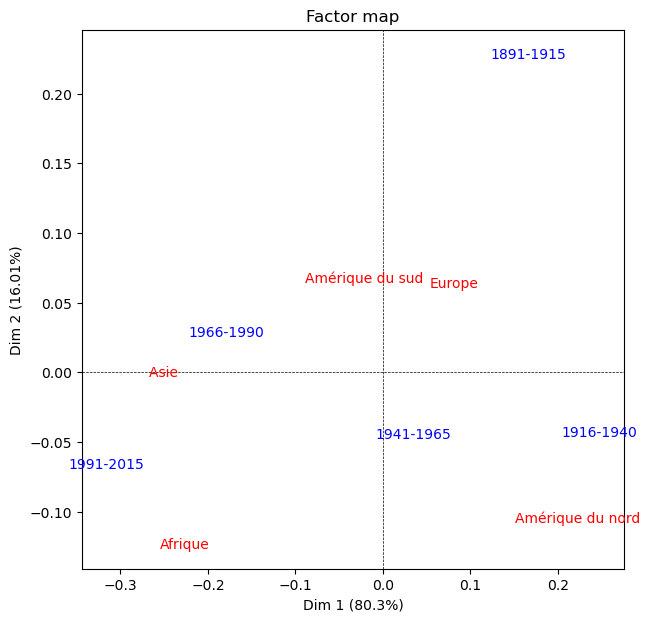

In [30]:

# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

### Commentaire

## Représenter l'autre plan factoriel

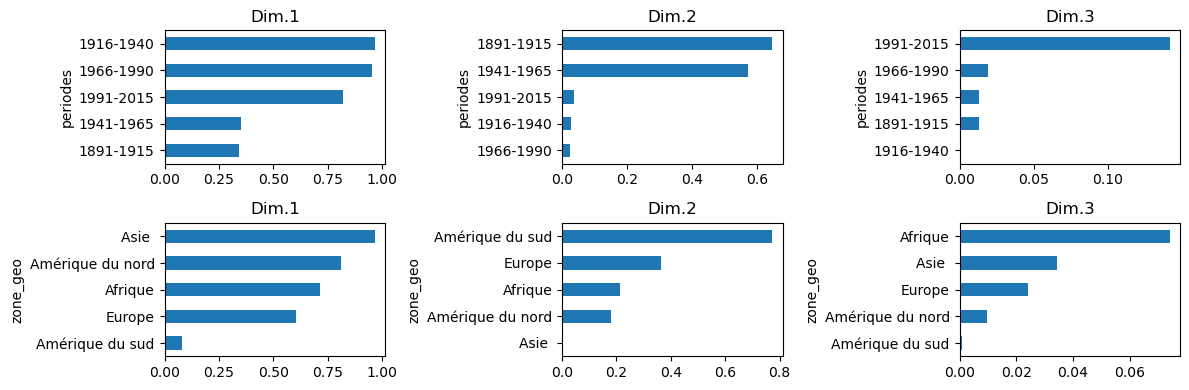

In [31]:

### Informations sur les cosinus carrés. Ces valeurs expriment 
# la qualité de représentation d'une modalité sur l'axe correspondant

### Colonnes
df = afc.col_topandas()[['col_cos2_dim1',
                         'col_cos2_dim2',
                         'col_cos2_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,4))

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Lignes
df = afc.row_topandas()[['row_cos2_dim1',
                         'row_cos2_dim2',
                         'row_cos2_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

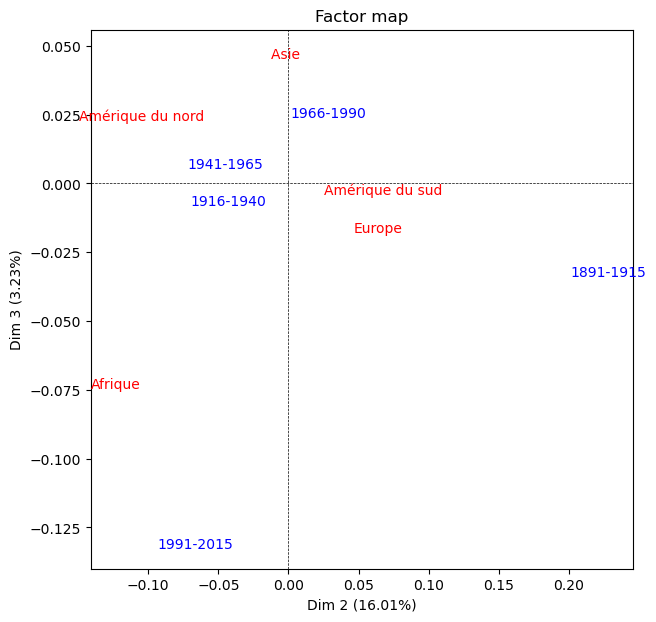

In [32]:

# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=2,num_y_axis=3,figsize=(7,7))


### Commentaire

In [33]:
D

periodes,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015
zone_geo,,,,,
Afrique,20,71,188,182,46
Amérique du nord,71,250,401,231,29
Amérique du sud,70,117,257,230,35
Asie,56,114,335,394,62
Europe,194,377,654,544,80
